In [3]:
import h5py
import pandas as pd
import numpy as np
from statistics import variance 
import matplotlib.pyplot as plt

f = h5py.File('forCluster.h5', 'r')
orig_data = h5py.File('2019-12-23-01_proc.h5', 'r')

In [4]:
pc1_order = f["data"]["order"]

In [5]:
df = pd.DataFrame((f['data']['eigvecs']))
df = df.transpose()
df

0         1         2         3         4         5         6   \
0   0.099993  0.136486  0.109777 -0.158096 -0.059331 -0.037348 -0.036478   
1   0.095620  0.141093  0.108226 -0.165055 -0.083642 -0.040968 -0.039195   
2   0.126589  0.020037  0.019199  0.001651  0.003475  0.100314  0.092462   
3   0.075787 -0.051013 -0.044734  0.119024 -0.174049  0.024947  0.058096   
4  -0.073312 -0.065661 -0.087595  0.244531 -0.023525 -0.093738  0.073774   
..       ...       ...       ...       ...       ...       ...       ...   
89 -0.052974  0.224202  0.038198 -0.052470 -0.080635  0.007240  0.139959   
90 -0.028226 -0.065188  0.056576 -0.110431 -0.092851 -0.003674  0.050785   
91  0.171743 -0.001820  0.031794 -0.089550 -0.018731 -0.027038  0.023609   
92 -0.122131 -0.110805 -0.031899 -0.136016 -0.026520 -0.005767  0.121036   
93 -0.133056 -0.097321 -0.117754  0.007744  0.042229  0.040876  0.151931   

          7         8         9   ...        84        85        86        87  \
0  -0.012534 -0.038383 -0.056107  ...  0.065297  0.014979  0.049035  0.041104   
1  -0.003066 -0.012881 -0.095666  ... -0.049801  0.074335 -0.057220 -0.081669   
2  -0.091224  0.026114 -0.000725  ...  0.005724  0.030987 -0.006253 -0.016369   
3  -0.080022  0.267142 -0.028448  ...  0.012491  0.022432 -0.017590  0.014729   
4  -0.032568 -0.053785  0.156173  ... -0.095189 -0.041859 -0.037519 -0.030758   
..       ...       ...       ...  ...       ...       ...       ...       ...   
89  0.044295 -0.020336 -0.034656  ... -0.012831 -0.001757  0.055204 -0.016102   
90 -0.046681  0.035122 -0.079205  ... -0.005357 -0.002712  0.024271  0.023209   
91 -0.082658 -0.069488  0.002697  ...  0.004199 -0.003964 -0.039008 -0.013453   
92 -0.239497  0.046028 -0.020748  ... -0.014041 -0.039785  0.115449 -0.066581   
93  0.206376 -0.115485 -0.060531  ... -0.154893  0.038816 -0.065028  0.035513   

          88        89        90        91        92        93  
0  -0.051163  0.096539 -0.022296  0.026766  0.051012  0.021075  
1  -0.017293 -0.099390  0.066662  0.014123 -0.038633 -0.004271  
2  -0.033728 -0.028675  0.000897 -0.000557  0.002934 -0.009773  
3   0.044693  0.005230 -0.005433  0.000937  0.024136 -0.003822  
4  -0.021152 -0.020045 -0.005337  0.038711 -0.042946 -0.005199  
..       ...       ...       ...       ...       ...       ...  
89  0.033547  0.044797 -0.014954  0.005601  0.012195  0.022919  
90 -0.008653  0.003854 -0.002135 -0.003349 -0.003442 -0.003832  
91 -0.114688 -0.015014 -0.008383 -0.006120  0.038141 -0.048790  
92 -0.016131  0.083754 -0.028922 -0.044034  0.015540  0.001371  
93  0.020143  0.055901 -0.001694  0.095261 -0.055349  0.038678  

[94 rows x 94 columns]

In [6]:
pc1_order = list(pc1_order)

# Basic Variance Analysis

# Clustering using k- means

In [7]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [8]:
df = pd.DataFrame((f['data']['eigvecs']))
df = df.transpose()
PC1 = list(df[0])
PC2 = list(df[1])

In [10]:
def var(_list):
    if len(_list) <= 1:
        return 0
    else:
        return variance(_list)

In [11]:
def kmeans_(n, df):
    return KMeans(n_clusters=n).fit(df)

In [12]:
def groups_of_labels(labels):
    result = {}
    for i in range(len(labels)):
        group = labels[i]
        if group not in result:
            result[group] = []
        result[group].append(i)
    return result

In [13]:
def var_in_each(groups, data):
    result = {}
    vars_= []
    for label in groups:
        group = groups[label]
        equiv_vals = []
        for key in group:
            equiv_vals.append(float(data.loc[key]))
        result[label] = var(equiv_vals)
        vars_.append(result[label])
    total_var = sum(vars_)
    return (total_var,result)

In [14]:
def plot_cost(data, start, end):
    pc1_inertias = []
    for i in range(start, end+1):
        kmeans = kmeans_(i, data)
        pc1_inertias.append(kmeans.inertia_)
    #plt.title("Cost vs Number of Clusters")
    plt.plot([i for i in range(start,end+1)], pc1_inertias)
    plt.xlabel("number of clusters")
    plt.ylabel("cost")
    plt.show()
    diff = [(pc1_inertias[i+1] - pc1_inertias[i]) for i in range(end-start)]
    #plt.title("Difference in Cost vs Number of Clusters")
    plt.plot([i for i in range(start,end)], diff)
    plt.show()

In [15]:
def show_groups(n, df, cent= True):
    kmeans = kmeans_(n, df)
    groups = groups_of_labels(kmeans.labels_)
    centroids = kmeans.cluster_centers_
    plt.scatter(PC1, PC2, c= kmeans.labels_.astype(float), s=50, alpha =1 ,cmap='viridis', linewidths= None)
    if cent:
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
    plt.xlabel("pc1")
    plt.ylabel("pc2")
    plt.show()
    return groups

### Clustering using varaince in the first PC component

In [16]:
Data = {'PC1': PC1}
df_1 = DataFrame(Data, columns= ['PC1'])
Data = {'PC1': PC1,
        'PC2': PC2
       }

df_2 = DataFrame(Data,columns=['PC1','PC2'])


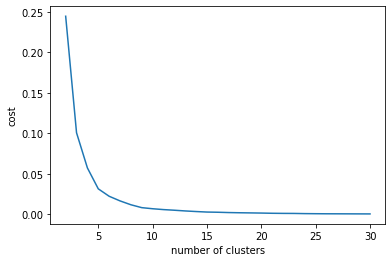

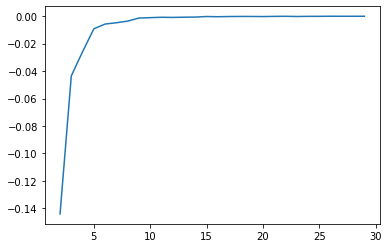

In [17]:
plot_cost(df_1, 2, 30)

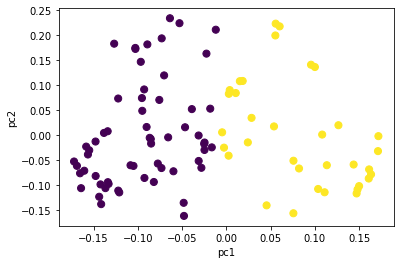

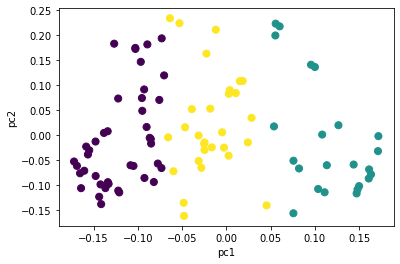

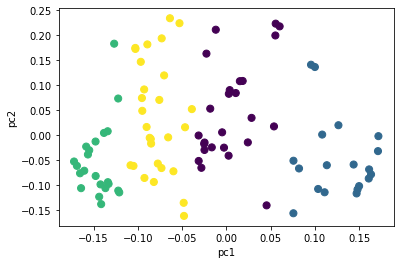

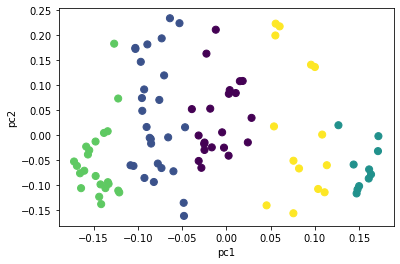

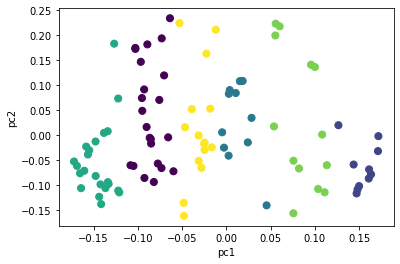

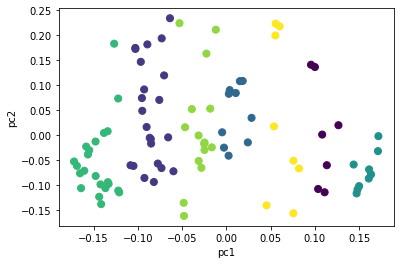

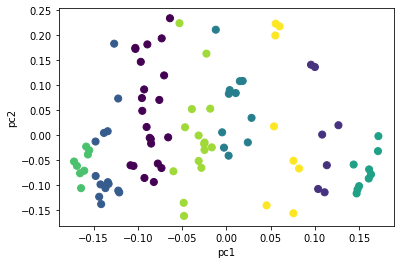

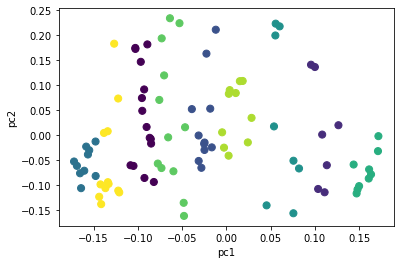

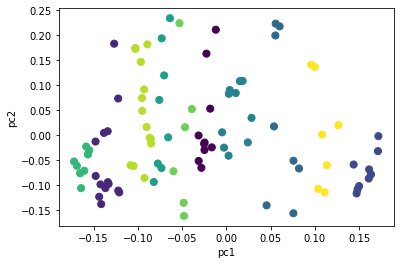

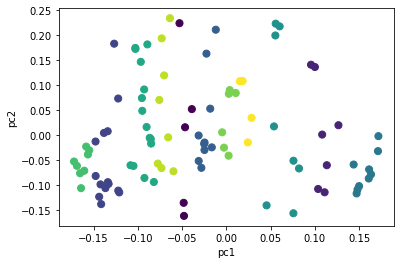

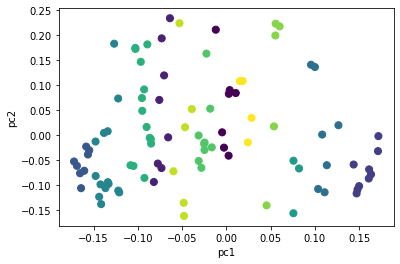

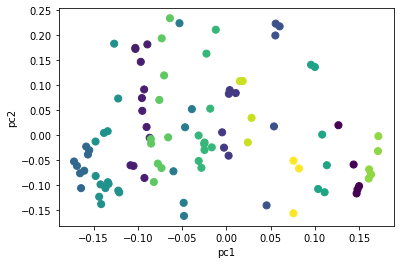

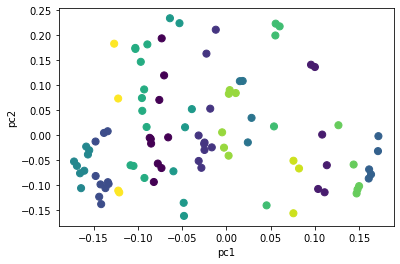

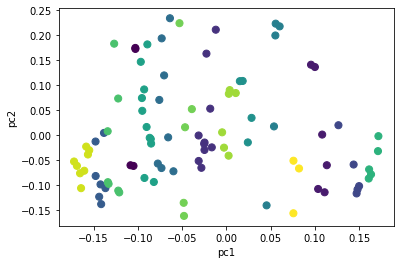

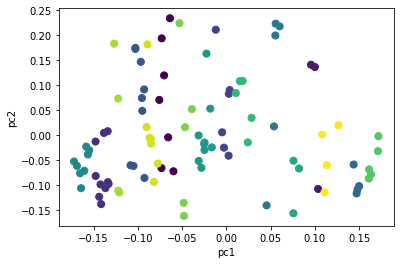

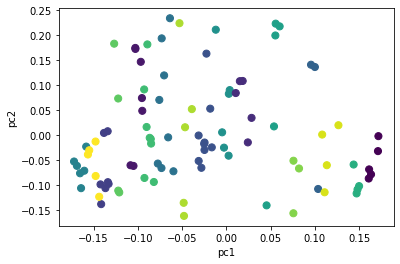

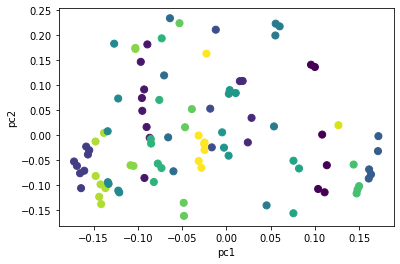

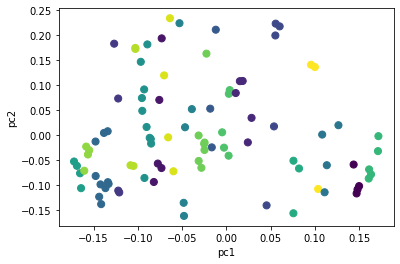

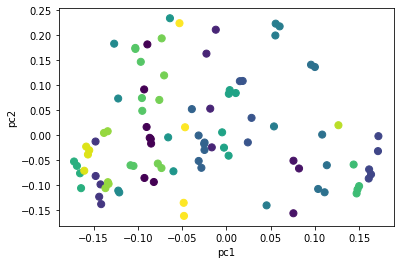

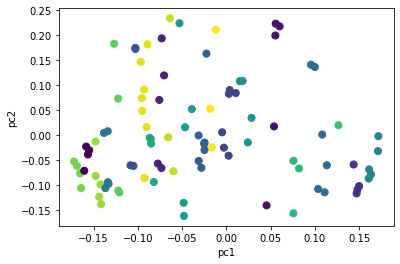

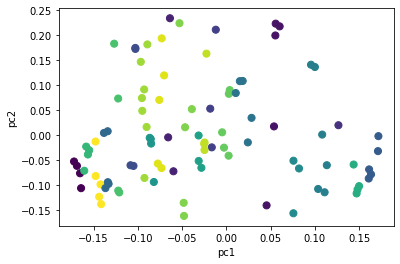

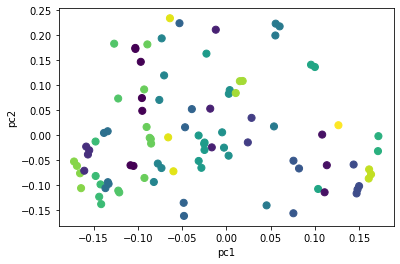

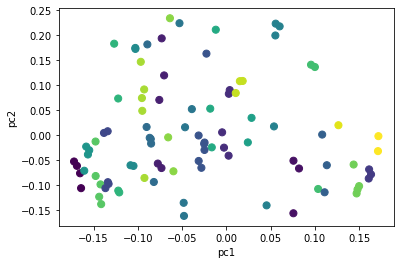

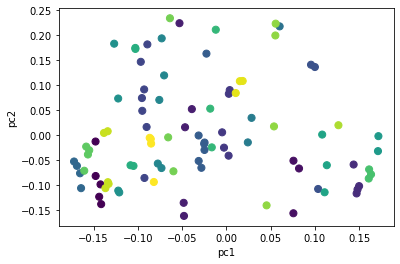

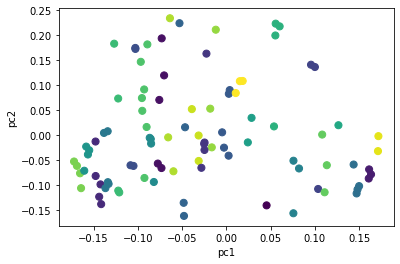

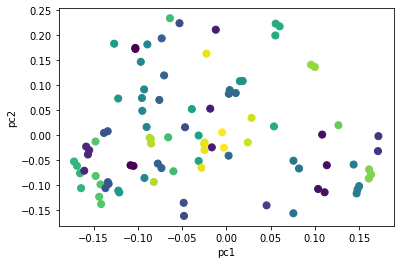

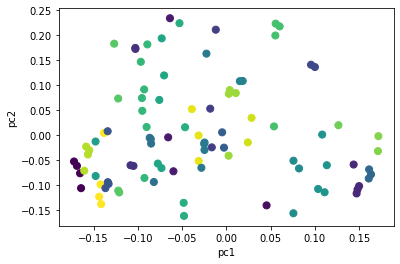

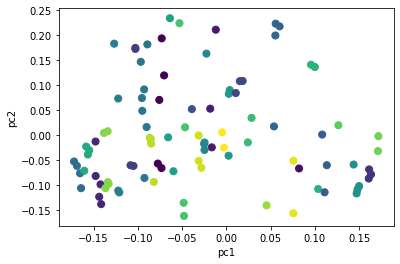

In [18]:
total_var_for_i = []
stacked = []
x_s= [i for i in range(len(PC1))]
pc1_inertias = []
m=30
for i in range(2, m):
    kmeans = kmeans_(i, df_1)
    groups = groups_of_labels(kmeans.labels_)
    total_var, each_var = var_in_each(groups, df_1)
    pc1_inertias.append(kmeans.inertia_)
    one_stack = []
    for one_var in each_var.values():
        one_stack.append(one_var)
        
    total_var_for_i.append(total_var/i)
    #plt.title("K-means Clustering using PC1 for "+ str(i) + " Clusters")
    plt.xlabel("pc1")
    plt.ylabel("pc2")
    plt.scatter(df_2['PC1'], df_2['PC2'], c= kmeans.labels_.astype(float), s=50, alpha=1, cmap='viridis')
    plt.show()

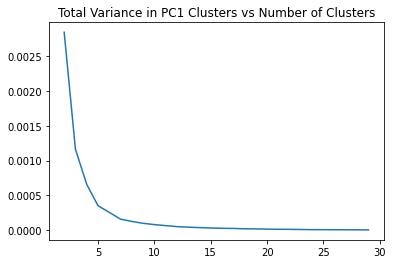

In [19]:
plt.title("Total Variance in PC1 Clusters vs Number of Clusters")
plt.plot([i for i in range(2, m)], total_var_for_i)
plt.show()

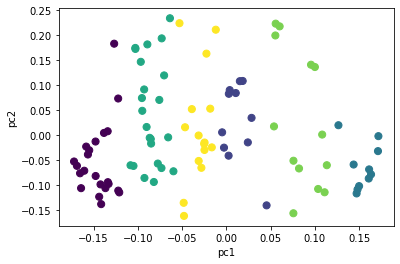

In [20]:
#plt.title("K-means Clustering using PC1 only")
g1 = ((show_groups(6, df_1, False)))

In [21]:
print(list((f["data"]["order"]))[:10])

[17, 58, 41, 23, 63, 51, 71, 72, 30, 59]


### Clustering using the first two components

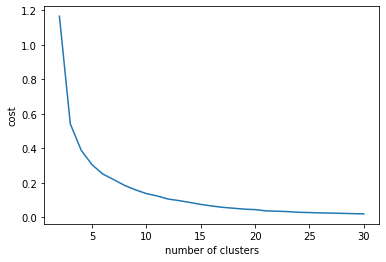

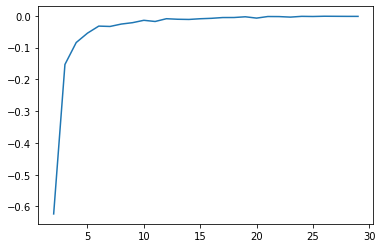

In [22]:
plot_cost(df_2, 2, 30)

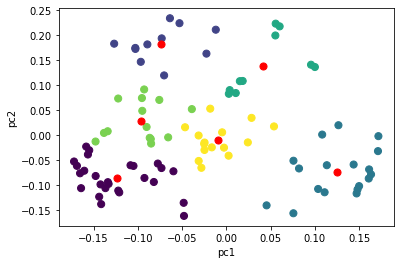

In [23]:
#plt.title("K-means Clustering using PC1 and PC2")
groups_2 = show_groups(6, df_2)


In [24]:
clusters_pc_2= groups_of_labels(kmeans.labels_)
print(clusters_pc_2)


{18: [0, 1, 25], 21: [2], 27: [3, 51], 0: [4, 5, 73, 82, 83], 2: [6, 11, 18], 13: [7, 8, 43, 63], 3: [9, 29, 58, 61, 72], 5: [10, 14, 79, 81], 25: [12, 54, 74, 80], 24: [13], 11: [15, 24, 36, 39, 42, 46, 78], 10: [16, 22, 40, 57], 16: [17, 32, 76], 6: [19, 35, 68], 15: [20, 31, 37], 8: [21, 75, 85], 9: [23, 27, 33, 47], 20: [26, 55, 64, 89], 19: [28, 77], 23: [30, 69, 84, 88, 93], 12: [34, 66, 67, 92], 4: [38, 41, 86], 1: [44], 7: [45], 26: [48, 56, 90], 14: [49, 52, 60, 65], 17: [50, 62, 70, 71], 28: [53, 87], 22: [59, 91]}


In [25]:
kmeans.labels_

array([18, 18, 21, 27,  0,  0,  2, 13, 13,  3,  5,  2, 25, 24,  5, 11, 10,
       16,  2,  6, 15,  8, 10,  9, 11, 18, 20,  9, 19,  3, 23, 15, 16,  9,
       12,  6, 11, 15,  4, 11, 10,  4, 11, 13,  1,  7, 11,  9, 26, 14, 17,
       27, 14, 28, 25, 20, 26, 10,  3, 22, 14,  3, 17, 13, 20, 14, 12, 12,
        6, 23, 17, 17,  3,  0, 25,  8, 16, 19, 11,  5, 25,  5,  0,  0, 23,
        8,  4, 28, 23, 20, 26, 22, 12, 23], dtype=int32)

### Clustering using original data

In [54]:
df_all = DataFrame(orig_data['f_processed'])
df_all = df_all.transpose()

In [55]:
df_all.loc[1]

0       0.680366
1       0.708218
2       0.699543
3       0.570321
4       0.493593
          ...   
1726    0.082981
1727    0.083021
1728    0.083025
1729    0.083025
1730    0.083027
Name: 1, Length: 1731, dtype: float64

In [804]:
set_ = {}
for i in range(94):
    if abs(PC1[i]/PC2[i])>1:
        set_[PC1[i]/PC2[i]]= i
l = list(set_.keys())
l.sort()

In [808]:
nn = []
for i in l:
    nn.append(set_[i])
len(nn)
nn.reverse()

In [809]:
s = [df_all.loc[i] for i in nn if i not in {47, 63, 46, 66, 2, 7, 26, 42,77,3}]
#l = [df_all.loc[i] for i in nn if i in {47, 63, 46, 66, 2, 7, 26, 42,77,3}]
#l.reverse()
#s = l+s
s = pd.DataFrame(s)
s = s.transpose()
print([PC1[i]/PC2[i] for i in {47, 63, 46, 66, 2, 7, 26, 42,77,3}])

[-1.6636536402604842, 6.31776497636959, -1.4856451262802606, 1.6886554718405309, -1.2824732498780582, -1.6902866211085652, -1.9447002867646455, 3.0494411982839975, -2.926085771469058, 1.4500440363556955]


In [810]:
import seaborn as sns

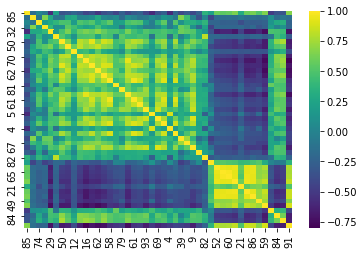

In [811]:
sns.heatmap(s.corr(), cmap= 'viridis')

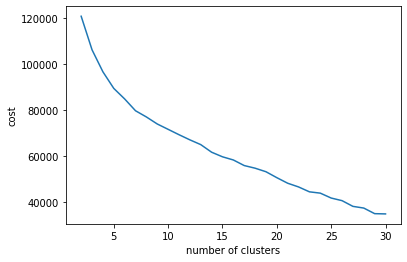

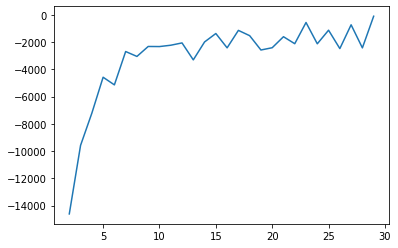

In [630]:
plot_cost(df_all, 2, 30)

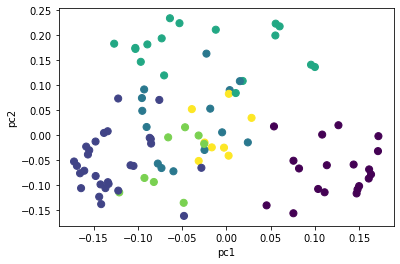

In [28]:
#plt.title("K-means Clustering on the Original Data")
groups_all = (show_groups(6, df_all, False))

In [29]:
kmeans= KMeans(n_clusters=6).fit(df_all)

In [30]:
clusters_all = groups_of_labels(kmeans.labels_)
print(clusters_all)
s = 0
for i in clusters_all:
    s += len(clusters_all[i])
    print(s)


{4: [0, 1, 10, 11, 14, 17, 19, 23, 24, 27, 33, 34, 68, 73, 83, 89], 3: [2, 3, 13, 21, 25, 38, 41, 44, 47, 49, 51, 52, 59, 60, 65, 75, 85, 86, 91], 5: [4, 5, 8, 12, 26, 29, 32, 39, 42, 48, 54, 63, 64, 67, 76], 0: [6, 7, 28, 31, 37, 45, 56, 87], 1: [9, 16, 22, 30, 40, 50, 55, 57, 58, 61, 62, 66, 69, 70, 71, 72, 74, 79, 80, 81, 82, 84, 88, 90, 92, 93], 2: [15, 18, 20, 35, 36, 43, 46, 53, 77, 78]}
16
35
50
58
84
94


In [31]:
print(clusters_pc_2)

{18: [0, 1, 25], 21: [2], 27: [3, 51], 0: [4, 5, 73, 82, 83], 2: [6, 11, 18], 13: [7, 8, 43, 63], 3: [9, 29, 58, 61, 72], 5: [10, 14, 79, 81], 25: [12, 54, 74, 80], 24: [13], 11: [15, 24, 36, 39, 42, 46, 78], 10: [16, 22, 40, 57], 16: [17, 32, 76], 6: [19, 35, 68], 15: [20, 31, 37], 8: [21, 75, 85], 9: [23, 27, 33, 47], 20: [26, 55, 64, 89], 19: [28, 77], 23: [30, 69, 84, 88, 93], 12: [34, 66, 67, 92], 4: [38, 41, 86], 1: [44], 7: [45], 26: [48, 56, 90], 14: [49, 52, 60, 65], 17: [50, 62, 70, 71], 28: [53, 87], 22: [59, 91]}


In [32]:
l = {3: [0, 1, 19, 20, 23, 27, 31, 33, 35, 68], 0: [2, 3, 13, 21, 25, 38, 41, 44, 49, 51, 52, 59, 60, 65, 75, 85, 86, 91], 4: [4, 5, 9, 16, 22, 39, 40, 54, 55, 57, 58, 61, 62, 64, 67, 69, 70, 72, 76, 79, 81, 88, 92, 93], 1: [6, 7, 8, 18, 26, 28, 32, 37, 45, 47, 48, 53, 56, 63, 77, 87, 90], 2: [10, 11, 14, 15, 17, 24, 34, 43, 73, 83, 89], 5: [12, 29, 30, 36, 42, 46, 50, 66, 71, 74, 78, 80, 82, 84]}

In [33]:
s = len(l[3])

print(len(l[0]))
print(len(l[4]))
print(len(l[1]))
print(len(l[2]))
print(len(l[5]))


18
24
17
11
14


# Clustering for higher PC's

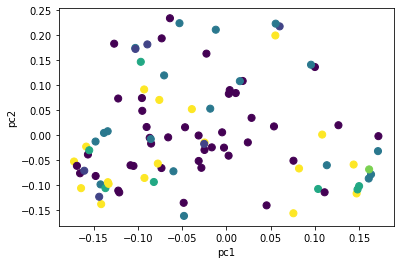

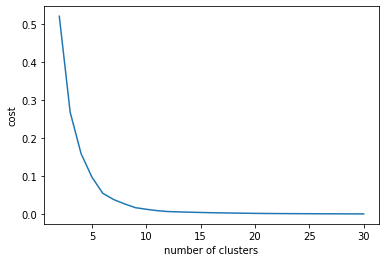

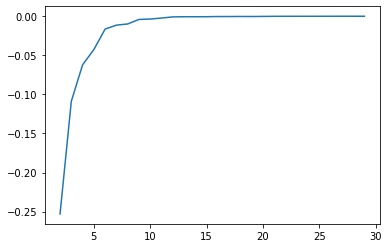

In [34]:
Data = {'PCk': list(df[80])}
df_k = DataFrame(Data, columns= ['PCk'])
#plt.title("K-means Clustering using a Higher Principal Component (PC81)")
gg = (show_groups(6, df_k, False))
plot_cost(df_k, 2, 30)

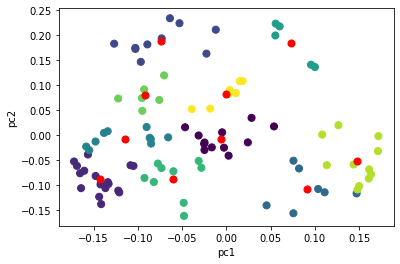

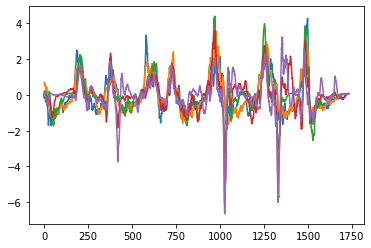

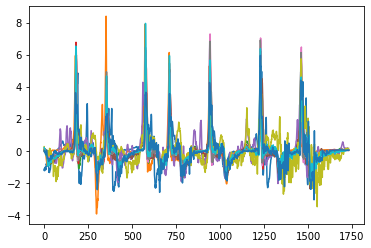

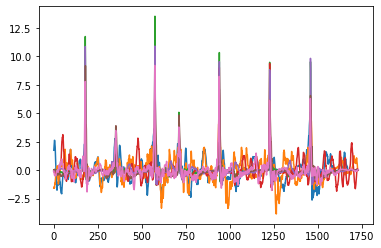

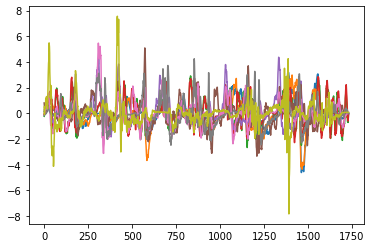

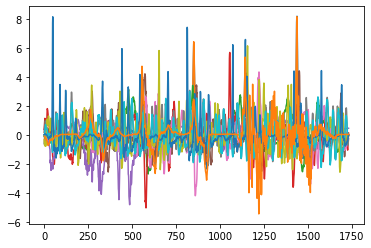

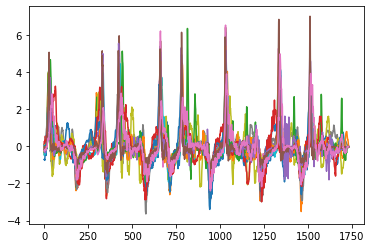

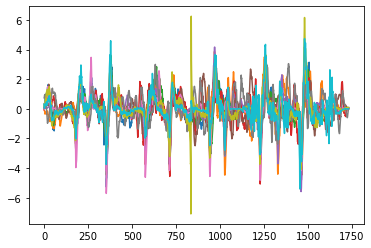

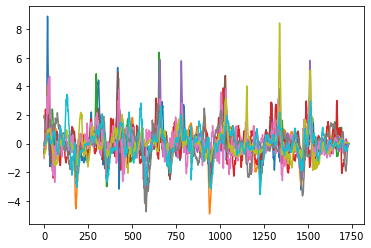

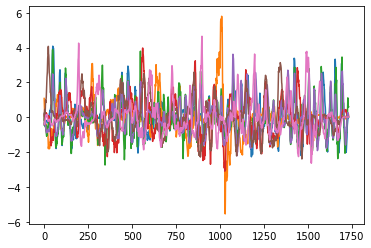

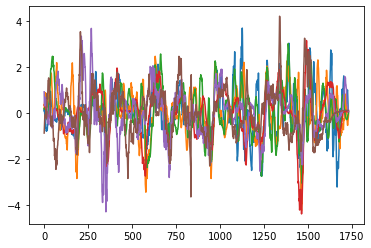

In [35]:
groups_2 = show_groups(10, df_2)

for list_ in groups_2.values():
    for el in list_:
        plt.plot(df_all.loc[el])
    plt.show()

In [36]:
general_patterns_2 = []
for list_ in groups_2.values():
    sum_ = sum([df_all.loc[el] for el in list_])/len(list_)
    general_patterns_2.append(sum_)


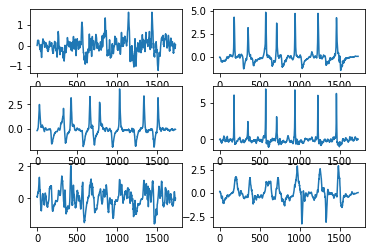

In [37]:
s = [326, 322, 324, 325, 321, 323]
#s = [321, 322, 323, 324, 325, 326]

for i in range(6):
    plt.subplot(s[i])
    plt.plot(general_patterns_2[i])
plt.show()

In [38]:
general_patterns = []
for list_ in groups_all.values():
    sum_ = sum([df_all.loc[el] for el in list_])/len(list_)
    general_patterns.append(sum_)


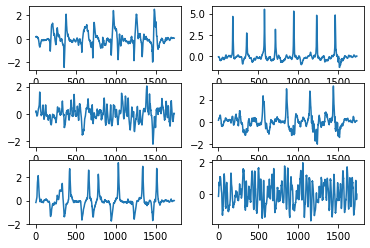

In [39]:
s = [321, 322, 323, 324, 325, 326]
m = [231, 232, 233, 234, 235, 236]
for i in range(6):
    plt.subplot(s[i])
    plt.plot(general_patterns[i])
plt.show()

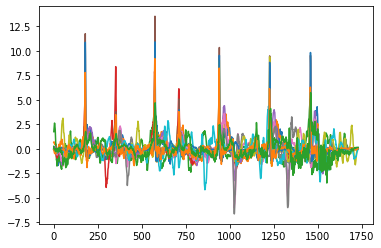

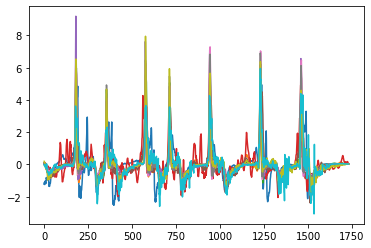

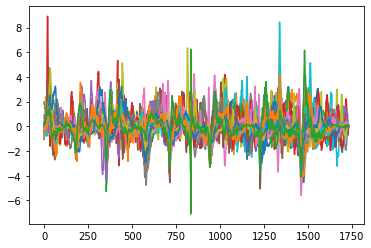

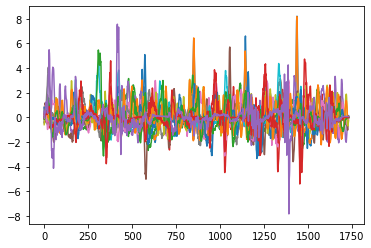

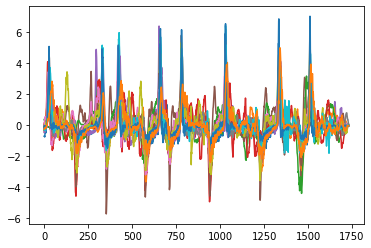

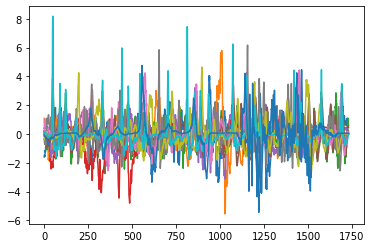

In [40]:
for list_ in g1.values():
    for el in list_:
        plt.plot(df_all.loc[el])
    plt.show()